### Задание

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.

Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

Требуется выполнить следующее задание:

1. Загрузите файл HR.csv в pandas dataframe. (5 баллов)
2. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение) (10 баллов)
3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные. (10 баллов)
4. Рассчитайте сколько сотрудников работает в каждом департаменте. (5 баллов)
5. Показать распределение сотрудников по зарплатам. (5 баллов)
6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности. (5 баллов)
7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом (10 баллов)
8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):(10 баллов)
● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности
● Среднее количество проектов
9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) Оценить качество модели на тестовой выборки(20 баллов)
10. Загрузить jupyter notebook с решение на github и прислать ссылку (5 баллов)

Более подробное описание признаков:
1. satisfaction_level - Уровень удовлетворенности работой (количественный)
значение - вещественное число
2. Last_evaluation - Время с момента последней оценки в годах (количественный)
значение - вещественное число
3. number_projects - Количество проектов, выполненных за время работы (количественный)
значение - целое число
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц (количественный)
значение - целое число
5. time_spend_company - Стаж работы в компании в годах (количественный)
значение - целое число
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником (категориальный)
одно из 2 значений (0 - no, 1 - yes)
7. left - уволился ли сотрудник (категориальный)
одно из 2 значений (0 - no, 1 - yes)
8. promotion_last_5years - повышался ли сотрудник за последние пять лет (категориальный)
одно из 2 значений (0 - no, 1 - yes)
9. department - отдел в котором работает сотрудник(категориальный)
одно из 10 значений ('sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT', 'product_mng', 'marketing', 'RandD')
10. salary - относительный уровень зарплаты (категориальный)
одно из 3 значений (low/medium/high)


In [1]:
# импортируем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

### 1. Загрузим файл hr.csv в pandas dataframe:

In [2]:
data = pd.read_csv('hr.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# создадим второй датасет для будущего построения модели lda
data_lda = data.drop(['department', 'salary'], axis=1)
data_lda.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
#data['Work_accident'].value_counts()
#data['left'].value_counts()
#data['time_spend_company'].value_counts()
#data['last_evaluation'].value_counts()
#data['number_project'].value_counts()
#data['average_montly_hours'].value_counts()
#data['promotion_last_5years'].value_counts()
#data['salary'].value_counts()

### 2. Рассчитаем основные статистики для количественных переменных:

In [6]:
data_2 = data[['satisfaction_level','last_evaluation', 'number_project', 'average_montly_hours','time_spend_company']]
data_2.head()
data_2.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [7]:
print('Уровень удовлетворенности работой (satisfaction_level):')
print()
print('среднее значение:', data.satisfaction_level.mean())
print('минимальное значение:', data.satisfaction_level.min())
print('максимальное значение:', data.satisfaction_level.max())
print('медиана:', data.satisfaction_level.median())
print('мода:', data.satisfaction_level.mode()[0])
print('СКО:', data.satisfaction_level.std())
print('дисперсия:', data.satisfaction_level.var())

Уровень удовлетворенности работой (satisfaction_level):

среднее значение: 0.6128335222348166
минимальное значение: 0.09
максимальное значение: 1.0
медиана: 0.64
мода: 0.1
СКО: 0.2486306510611418
дисперсия: 0.061817200647087255


In [8]:
print('Время с момента последней оценки в годах (last_evaluation):')
print()
print('среднее значение:', data.last_evaluation.mean())
print('минимальное значение:', data.last_evaluation.min())
print('максимальное значение:', data.last_evaluation.max())
print('медиана:', data.last_evaluation.median())
print('мода:', data.last_evaluation.mode()[0])
print('СКО:', data.last_evaluation.std())
print('дисперсия:', data.last_evaluation.var())

Время с момента последней оценки в годах (last_evaluation):

среднее значение: 0.7161017401159978
минимальное значение: 0.36
максимальное значение: 1.0
медиана: 0.72
мода: 0.55
СКО: 0.17116911062327592
дисперсия: 0.02929886443156327


In [9]:
print('Количество проектов, выполненных за время работы (number_project):')
print()
print('среднее значение:', data.number_project.mean())
print('минимальное значение:', data.number_project.min())
print('максимальное значение:', data.number_project.max())
print('медиана:', data.number_project.median())
print('мода:', data.number_project.mode()[0])
print('СКО:', data.number_project.std())
print('дисперсия:', data.number_project.var())

Количество проектов, выполненных за время работы (number_project):

среднее значение: 3.80305353690246
минимальное значение: 2
максимальное значение: 7
медиана: 4.0
мода: 4
СКО: 1.2325923553183857
дисперсия: 1.5192839143893255


In [10]:
print('Среднее количество часов на рабочем месте в месяц (average_montly_hours):')
print()
print('среднее значение:', data.average_montly_hours.mean())
print('минимальное значение:', data.average_montly_hours.min())
print('максимальное значение:', data.average_montly_hours.max())
print('медиана:', data.average_montly_hours.median())
print('мода:', data.average_montly_hours.mode()[0])
print('СКО:', data.average_montly_hours.std())
print('дисперсия:', data.average_montly_hours.var())

Среднее количество часов на рабочем месте в месяц (average_montly_hours):

среднее значение: 201.0503366891126
минимальное значение: 96
максимальное значение: 310
медиана: 200.0
мода: 135
СКО: 49.943099371284305
дисперсия: 2494.313174809979


In [11]:
print('Стаж работы в компании в годах (time_spend_company):')
print()
print('среднее значение:', data.time_spend_company.mean())
print('минимальное значение:', data.time_spend_company.min())
print('максимальное значение:', data.time_spend_company.max())
print('медиана:', data.time_spend_company.median())
print('мода:', data.time_spend_company.mode()[0])
print('СКО:', data.time_spend_company.std())
print('дисперсия:', data.time_spend_company.var())

Стаж работы в компании в годах (time_spend_company):

среднее значение: 3.498233215547703
минимальное значение: 2
максимальное значение: 10
медиана: 3.0
мода: 3
СКО: 1.4601362305354546
дисперсия: 2.1319978117222864


### 3. Рассчитаем и построим визуализацию корреляционной матрицы для количественных переменных и определим две самые скоррелированные и две наименее скоррелированные переменные:

In [12]:
corr = data_2.corr()
corr.style.background_gradient(cmap='coolwarm')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


In [13]:
#Другой вариант видуализации:

#def plot_corr(df,size=10):
#    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.
#
#    Input:
#        df: pandas DataFrame
#        size: vertical and horizontal size of the plot'''
#
#    corr = df.corr()
#    fig, ax = plt.subplots(figsize=(size, size))
#    ax.matshow(corr)
#    plt.xticks(range(len(corr.columns)), corr.columns);
#    plt.yticks(range(len(corr.columns)), corr.columns);
#
#plot_corr(data_2, size=10)

### Две самые скоррелированные переменные: average_montly_hours и number_project
#### (т.е. Количество проектов, выполненных за время работы и Среднее количество часов на рабочем месте в месяц)
### Две наименее скоррелированные переменные: satisfaction_level и number_project
#### (т.е. Количество проектов, выполненных за время работы и Уровень удовлетворенности работой)

### 4. Рассчитаем, сколько сотрудников работает в каждом департаменте:

In [14]:
print('Общее количество сотрудников каждого департамента (за весь период):')
data['department'].value_counts()

Общее количество сотрудников каждого департамента (за весь период):


sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

Text(0, 0.5, 'Number of employees')

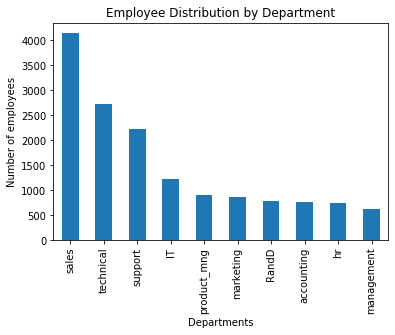

In [15]:
em = data.department.value_counts().plot.bar()
em.set_title('Employee Distribution by Department')
em.set_xlabel('Departments')
em.set_ylabel('Number of employees')

In [16]:
print('Количество сотрудников, работающих в каждом департаменте на момент проведения опроса:')
print()
current_data = data.loc[data.left == 0]['department'].value_counts()
print(current_data)

Количество сотрудников, работающих в каждом департаменте на момент проведения опроса:

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: department, dtype: int64


Text(0, 0.5, 'Number of employees')

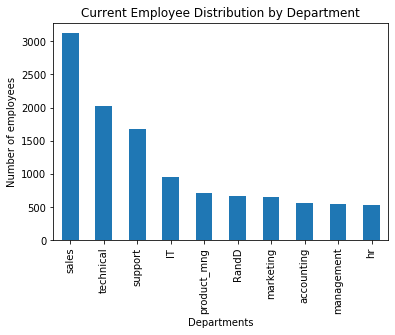

In [17]:
em_2 = current_data.plot.bar()
em_2.set_title('Current Employee Distribution by Department')
em_2.set_xlabel('Departments')
em_2.set_ylabel('Number of employees')

### 5. Распределение сотрудников по зарплатам:¶

In [18]:
salary_group = data['salary'].unique()
print('Общее распределение сотрудников по зарплатам:')
print()
print(data['salary'].value_counts())

Общее распределение сотрудников по зарплатам:

low       7316
medium    6446
high      1237
Name: salary, dtype: int64


Text(0, 0.5, 'Number of employees')

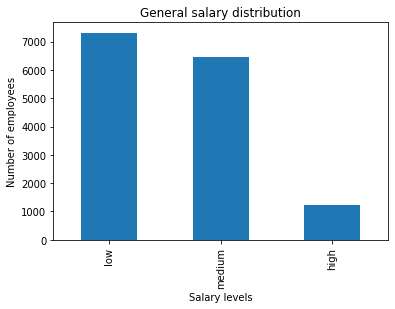

In [19]:
ax = data.salary.value_counts().plot.bar()
ax.set_title('General salary distribution')
ax.set_xlabel('Salary levels')
ax.set_ylabel('Number of employees')

### 6. Распределение сотрудников по зарплатам в каждом департаменте по отдельности:¶

Text(0, 0.5, 'Number of employees')

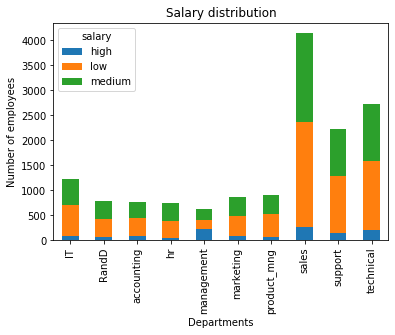

In [20]:
ax = pd.crosstab(data.department, data.salary).plot.bar(stacked=True)
ax.set_title('Salary distribution')
ax.set_xlabel('Departments')
ax.set_ylabel('Number of employees')

In [21]:
data_salary = data[['department', 'salary']]
salaries = data_salary.groupby(["department"]).agg({
  "salary": "value_counts"})
salaries.columns = ['employees_no']
salaries.head(10)

employees_no
department salary              
IT         low              609
           medium           535
           high              83
RandD      medium           372
           low              364
           high              51
accounting low              358
           medium           335
           high              74
hr         medium           359

### 7. Проверим гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [22]:
# посмотрим на картину по среднему количеству рабочего времени по отделам:
hours_salaries = data.pivot_table(
                        index='department', 
                        columns='salary', 
                        values='average_montly_hours', 
                        aggfunc=np.mean)

hours_salaries.head(10)

salary,high,low,medium
department,,,
IT,194.927711,201.382594,204.295327
RandD,199.745098,198.747253,202.954301
accounting,205.905405,199.899441,201.465672
hr,209.066667,202.456716,193.863510
management,200.248889,200.744444,202.653333
marketing,185.575000,204.487562,196.869681
product_mng,194.632353,201.048780,199.637076
sales,201.178439,200.363030,201.520316
support,203.985816,198.900524,202.535032


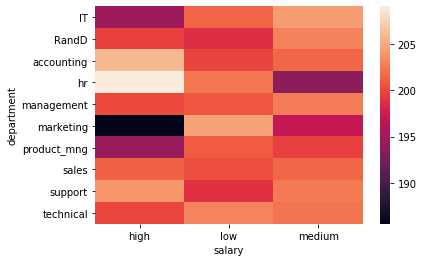

In [23]:
# Чем больше рабочих часов, тем светлее область
hours_salaries_heatmap = sns.heatmap(hours_salaries)

In [24]:
# выводим общее среднее значение
data_2 = data[['salary', 'average_montly_hours']]
data_2.head()
data_dynamics = data_2.groupby(['salary']).mean()
data_dynamics.head()

,average_montly_hours
salary,
high,199.867421
low,200.996583
medium,201.338349


### В соотвествии со средними значениями показателей всех сотрудников - больше всего времени на работе проводят сотрудники со средним окладом (201.338349), чуть меньше времени на работе проводят сотрудники с низким окладом (200.996583) и только на последнем третьем месте оказываются сотрудники с самым высоким окладом (199.867421), которые проводят на работе в среднем меньше всего времени.

#### Данные варьируются в зависисмости от департамента \ отдела. Например, средние показатели сотрудников 2-х отделов - бухгалтерия и поддержка -  действительно имеют распределение по зарплатам в соответствии с количеством проведенных часов на работе. А отделы маркетинга и продуктового менеджмента показывают яркую противоположную гипотезе картину - сотрудники с более высокими окладами в среднем работают меньше сотрудников со средними и намного меньше сотрудников с самыми низкими окладами. В остальных отделах - в среднем больше всего времени на работе проводят сотрудники со средним окладом.
Общая картина хорошо видна на тепловой карте

### 8. Расчитываю показатели среди уволившихся и действующих сотрудников

In [25]:
# подготавливаю датафрейм для более удобного восприятия категориальных признаков
data.loc[data['left'] == 0, 'left'] = 'no'
data.loc[data['left'] == 1, 'left'] = 'yes'
data.loc[data['promotion_last_5years'] == 0, 'promotion_last_5years'] = 'no'
data.loc[data['promotion_last_5years'] == 1, 'promotion_last_5years'] = 'yes'

In [26]:
# сводим в один маленький датафрейм инфорамацию по необходимым показателям:
all_employees = data.pivot_table(index='left', 
                       values=['satisfaction_level','number_project'], 
                        aggfunc={'satisfaction_level':np.mean,'number_project':np.mean}).fillna(0).applymap(float)

all_employees.head()

,number_project,satisfaction_level
left,,
no,3.786664,0.666810
yes,3.855503,0.440098


In [27]:
# создаем два отдельных датафрейма для уволившихся и не уволившихся сотрудников
former_employees = data.loc[data.left == 'yes']
actual_employees = data.loc[data.left == 'no']
#former_employees.info()
#actual_employees.info()

In [28]:
# бывшие сотрудники
former_employees.promotion_last_5years.value_counts(normalize=True)

no     0.994679
yes    0.005321
Name: promotion_last_5years, dtype: float64

In [29]:
# действующие сотрудники
actual_employees.promotion_last_5years.value_counts(normalize=True)

no     0.973749
yes    0.026251
Name: promotion_last_5years, dtype: float64

## Доля сотрудников с повышением за последние 5 лет:
#### 0,5 % - от общего числа уволившихся сотрудников
#### 2,6 % - от общего числа действующих сотрудников

##### Расчитываем показатели для бывших и действующих сотрудников: 
###### ● Средняя степень удовлетворенности 
###### ● Среднее количество проектов

In [30]:
# выводим информацию по необходимым показателям отдельно по каждой группе:
all_former_employees = former_employees[['promotion_last_5years', 'satisfaction_level', 'number_project']]
print('Показатели бывших сотрудников:')
print(all_former_employees.agg({'satisfaction_level': 'mean', 'number_project': 'mean'}))
print()
print('Показатели действующих сотрудников:')
all_actual_employees = actual_employees[['promotion_last_5years', 'satisfaction_level', 'number_project']]
print(all_actual_employees.agg({'satisfaction_level': 'mean', 'number_project': 'mean'}))

Показатели бывших сотрудников:
satisfaction_level    0.440098
number_project        3.855503
dtype: float64

Показатели действующих сотрудников:
satisfaction_level    0.666810
number_project        3.786664
dtype: float64


### 9. Разделим данные на тестовую и обучающую выборки. Построим модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) Оценим качество модели на тестовой выборке

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [32]:
data_train, data_test = train_test_split(data_lda, test_size=0.2)
lda = LinearDiscriminantAnalysis()

In [33]:
data_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
12113,0.90,0.96,4,258,5,0,1,0
10025,0.42,0.85,3,150,3,0,0,0
13685,0.77,0.65,3,156,4,0,0,0
3720,0.98,0.93,5,203,2,0,0,0
7674,0.40,0.65,6,172,2,1,0,0
...,...,...,...,...,...,...,...,...
9887,0.58,0.63,4,272,3,0,0,0
5298,0.21,0.85,5,153,3,0,0,0
2742,0.34,0.87,6,175,4,0,0,0
747,0.43,0.51,2,130,3,0,1,0


In [34]:
data_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
6127,0.76,0.64,4,144,2,0,0,0
7396,0.53,0.61,4,198,2,0,0,0
14764,0.79,1.00,5,257,6,0,1,0
153,0.40,0.52,2,155,3,0,1,0
6075,0.78,0.74,6,251,4,0,0,0
...,...,...,...,...,...,...,...,...
2766,0.80,0.54,4,269,3,0,0,0
2406,0.84,0.75,3,187,3,1,0,0
5227,0.64,0.65,3,181,2,0,0,0
7726,0.77,0.56,5,226,4,0,0,0


In [35]:
y_train, y_test = data_train['left'], data_test['left']
del data_train['left']
del data_test['left']

In [36]:
data_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
12113,0.90,0.96,4,258,5,0,0
10025,0.42,0.85,3,150,3,0,0
13685,0.77,0.65,3,156,4,0,0
3720,0.98,0.93,5,203,2,0,0
7674,0.40,0.65,6,172,2,1,0
...,...,...,...,...,...,...,...
9887,0.58,0.63,4,272,3,0,0
5298,0.21,0.85,5,153,3,0,0
2742,0.34,0.87,6,175,4,0,0
747,0.43,0.51,2,130,3,0,0


In [37]:
data_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
6127,0.76,0.64,4,144,2,0,0
7396,0.53,0.61,4,198,2,0,0
14764,0.79,1.00,5,257,6,0,0
153,0.40,0.52,2,155,3,0,0
6075,0.78,0.74,6,251,4,0,0
...,...,...,...,...,...,...,...
2766,0.80,0.54,4,269,3,0,0
2406,0.84,0.75,3,187,3,1,0
5227,0.64,0.65,3,181,2,0,0
7726,0.77,0.56,5,226,4,0,0


In [38]:
lda.fit(data_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [39]:
lda.predict(data_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
result = pd.DataFrame([y_test.values, lda.predict(data_test)]).T
result

,0,1
0,0,0
1,0,0
2,1,0
3,1,0
4,0,0
...,...,...
2995,0,0
2996,0,0
2997,0,0
2998,0,0


In [43]:
#Оценим качество модели на тестовой выборке

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test, lda.predict(data_test))

0.7583333333333333